In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings(action='ignore') 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

In [6]:
df = pd.read_csv('../../../high_diamond_ranked_10min.csv')
df

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [7]:
df.isna().sum()

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

<AxesSubplot:>

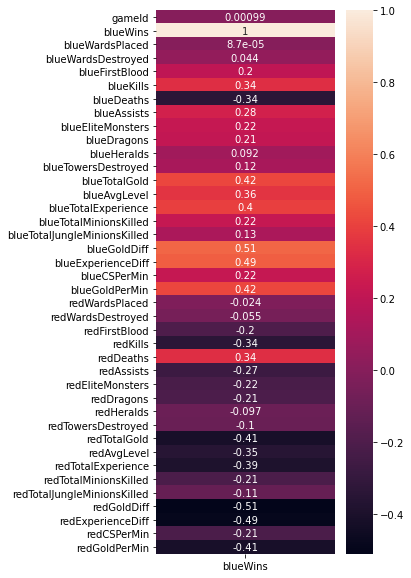

In [8]:


# blue wins 를 기준으로 상관계수 분석( blue wins 종속변수)
fig = plt.figure(figsize=(4, 10))
sns.heatmap(df.corr()[['blueWins']], annot=True)



In [9]:
df.drop('gameId', axis=1)

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,17,2,1,7,4,5,1,1,0,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,1,54,0,0,6,4,8,1,1,0,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,0,23,1,0,6,7,5,0,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,0,14,4,1,2,3,3,1,1,0,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


## Preprocesing

In [10]:
X = df.drop('blueWins', axis=1)
y = df.blueWins

X_tr, X_test, y_tr, y_test = train_test_split(X,y,random_state=42)

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, random_state=42)

## Scaling

In [12]:
scaler = StandardScaler()

In [13]:
scaler.fit(X_train)

StandardScaler()

In [14]:
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=X.columns)

## Log model 1

In [15]:
logreg = LogisticRegression()

In [16]:
def modeling_function(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)

    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)

    print('Training accuracy:', accuracy_score(y_train, train_preds))
    print("validation accuracy: ", accuracy_score(y_val, val_preds))

    return model

In [17]:
logreg_fitted = modeling_function(logreg, X_train_scaled, y_train, X_val_scaled, y_val)
logreg_fitted

Training accuracy: 0.7302015838732901
validation accuracy:  0.7425796006475985


LogisticRegression()

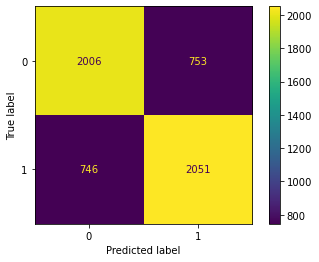

In [18]:
plot_confusion_matrix(logreg_fitted, X_train_scaled, y_train)

## Log Model 2

In [19]:
logreg2 = LogisticRegression(penalty='l1', solver='liblinear', C=.5, random_state=42, max_iter=5000)

In [20]:
logreg2.fit(X_train_scaled, y_train)

LogisticRegression(C=0.5, max_iter=5000, penalty='l1', random_state=42,
                   solver='liblinear')

In [21]:
logreg2 = modeling_function(logreg2, X_train_scaled, y_train, X_val_scaled, y_val)

Training accuracy: 0.7318214542836573
validation accuracy:  0.744738262277388


In [34]:
logreg2_coefs = pd.DataFrame(np.abs(logreg2.coef_.T), columns=['coefficient'], index=X_train_scaled.columns)

In [35]:
sorted_coefs = logreg2_coefs.sort_values(by='coefficient', ascending=False)

In [42]:
sorted_coefs.head(10)

,coefficient
blueGoldDiff,0.657204
redGoldDiff,0.397935
redExperienceDiff,0.233183
blueExperienceDiff,0.185626
blueTotalGold,0.168755
redCSPerMin,0.147885
blueTotalMinionsKilled,0.114506
redEliteMonsters,0.098783
redDragons,0.092488
blueAssists,0.088595


In [41]:
sorted_coefs.tail(10)

,coefficient
redKills,0.0
blueCSPerMin,0.0
redHeralds,0.0
blueTotalExperience,0.0
redTotalGold,0.0
redTotalMinionsKilled,0.0
blueHeralds,0.0
blueDeaths,0.0
blueWardsDestroyed,0.0
redGoldPerMin,0.0


## Decision Tree

In [22]:
dt = DecisionTreeClassifier(random_state=42, )

In [23]:
dt = modeling_function(dt, X_train_scaled, y_train, X_val_scaled, y_val)

Training accuracy: 1.0
validation accuracy:  0.6362655153804642


## Grid Search

In [24]:
param_grid = {'criterion': ["gini", "entropy"],
             'max_leaf_nodes': [2,3,4,5,6,7,8,9,10,11,12,13,14],
             'max_depth': [2,3,4,5,6,7,8,9,10,11,12]
             }

In [25]:
#dt_gs = GridSearchCV(estimator=dt, param_grid=param_grid, scoring='accuracy')

In [26]:
#dt_gs.fit(X_train_scaled, y_train)

In [27]:
dt_gs_model = dt_gs.best_estimator_

NameError: name 'dt_gs' is not defined

In [ ]:
dt_gs.best_params_

{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 6}

In [ ]:
modeling_function(dt_gs_model, X_train_scaled, y_train, X_val_scaled, y_val)

Training accuracy: 0.7237221022318214
validation accuracy:  0.7398812736103616


DecisionTreeClassifier(max_depth=4, max_leaf_nodes=6, random_state=42)

In [28]:
from sklearn.tree import DecisionTreeRegressor

In [29]:
dtr = DecisionTreeRegressor()

In [32]:
dtr = modeling_function(dtr, X_train_scaled, y_train, X_val_scaled, y_val)

Training accuracy: 1.0
validation accuracy:  0.6238532110091743


In [31]:
from sklearn.tree import plot_tree

In [43]:
from xgboost import XGBClassifier

In [57]:


XGB = XGBClassifier(learning_rate=0.05, n_estimators=1000, n_jobs=-1,max_depth=5)





In [58]:
modeling_function(XGB, X_train_scaled, y_train, X_val_scaled, y_val)

[09:42:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training accuracy: 0.9838012958963283
validation accuracy:  0.7161359956826767


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)